# OOP in Pytorch

# Softmax - Stable Softmax
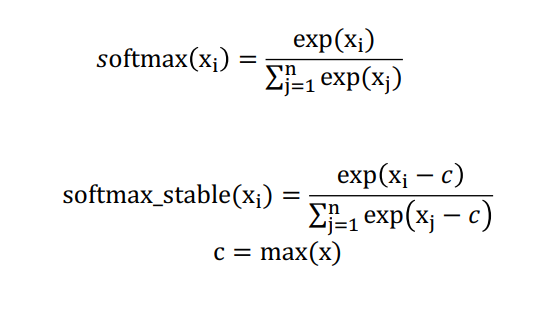
## Softmax
- **Định nghĩa**: Chuyển đổi logits thành phân phối xác suất, tổng = 1.
- **Công thức**: $$ \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}} $$
- **Vai trò**: Cung cấp xác suất, tương thích cross-entropy, tăng tính phân biệt.
- **Hạn chế**: Dễ tràn số (overflow) hoặc thiếu chính xác (underflow) với giá trị lớn/nhỏ.

## Stable Softmax
- **Định nghĩa**: Biến thể của softmax, ổn định số học.
- **Công thức**: $$ \text{stable-softmax}(z_i) = \frac{e^{z_i - c}}{\sum_{j} e^{z_j - c}}, \quad \text{với } c = \max(z) $$
- **Khác biệt**: Trừ giá trị lớn nhất c để tránh tràn số.
- **Ưu điểm**: Kết quả giống softmax nhưng tính toán ổn định hơn.

In [16]:
# Implement softmax using pytorch

import torch
import torch.nn as nn

class MySoftmax(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x):
        x_exp = torch.exp(x)
        partition = x_exp.sum(0, keepdims=True)
        return x_exp / partition

data = torch.Tensor([1, 2, 3])
my_softmax = MySoftmax()
output = my_softmax(data)
output

tensor([nan, nan, nan])

In [13]:
# Re-implement using numpy
import numpy as np

class NPSoftmax:
    def __init__(self):
        pass
    
    def softmax(self, arr):
        # Tính exp cho toàn bộ mảng
        arr_exp = np.exp(arr) # Numpy được thiết kế để xử lý các phép toán trên toàn bộ mảng (vectorized operations) nên không cần vòng lặp
        # Tính tổng các exp trong mảng
        arr_sum = np.sum(arr_exp)

        return arr_exp / arr_sum # phép chia giữa 1 mảng và 1 số vô hướng scalar value

data = np.array([1, 2, 3])
my_soft = NPSoftmax()
print(my_soft.softmax(data))

[0.09003057 0.24472847 0.66524096]


In [15]:
# Implement stable softmax using pytorch

import torch
import torch.nn as nn

class SoftmaxStable(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x):
        x_max = torch.max(x, dim=0, keepdims=True)
        x_exp = torch.exp(x - x_max.values)
        partition = x_exp.sum(0, keepdims=True)
        return x_exp / partition

data = torch.Tensor([1001, 1002, 1003])
softmax_stable = SoftmaxStable()
output = softmax_stable(data)
output 

tensor([0.0900, 0.2447, 0.6652])

In [18]:
# Re-implement using numpy
import numpy as np

class NPSoftmaxStable:
    def __init__(self):
        pass
    
    def softmax(self, arr):
        # Tìm phần tử lớn nhất trong array
        x_max = np.max(arr)
        new_arr = arr - x_max
        # Tính exp cho toàn bộ mảng
        new_arr_exp = np.exp(new_arr) # Numpy được thiết kế để xử lý các phép toán trên toàn bộ mảng (vectorized operations) nên không cần vòng lặp
        # Tính tổng các exp trong mảng
        arr_sum = np.sum(new_arr_exp)

        return new_arr_exp / arr_sum # phép chia giữa 1 mảng và 1 số vô hướng scalar value

data = np.array([1001, 1002, 1003])
my_soft = NPSoftmaxStable()
print(my_soft.softmax(data))

[0.09003057 0.24472847 0.66524096]
